In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset in a DataFrame
# Preview a few rows of the dataset
churn_data = pd.read_csv("customer_churn_original.csv")
churn_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [2]:
# Some characteristics of the dataset
churn_data.info()
print(churn_data.shape)

churn_data.describe()
# There seems to be no missing values in the dataset
# There seems to be no outliers in the dataset as well from the distribution of the numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


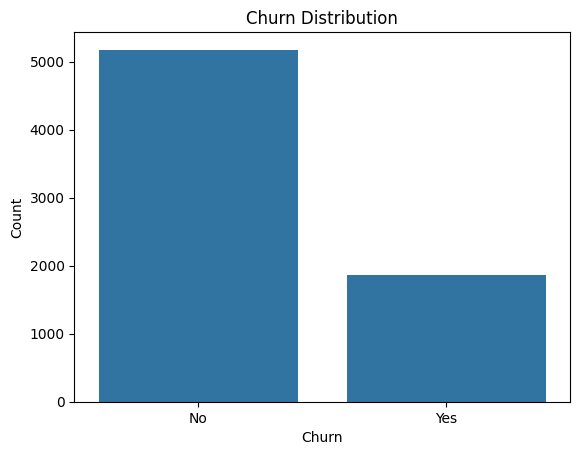

In [3]:
#Checking for the overall churn distribution
sns.countplot(x='Churn', data=churn_data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

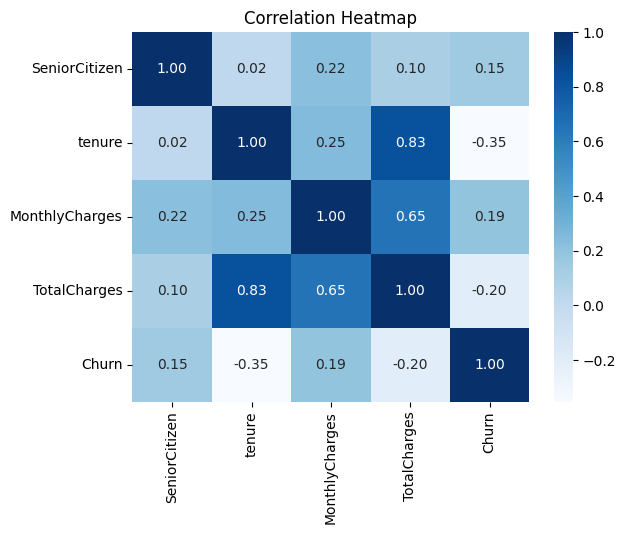

In [4]:
# Checking the correlation between features with numerical values
# Mapping the 'Churn' column to numical values in a copied dataframe
# Converting 'TotalCharges' to numeric type

churn_data_modified = churn_data.copy()
churn_data_modified['Churn'] = churn_data_modified['Churn'].map({'Yes': 1, 'No': 0})
churn_data_modified['TotalCharges'] = pd.to_numeric(churn_data_modified['TotalCharges'], errors='coerce')

corr = churn_data_modified[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Feature engineering
# Adding a new feature 'AutoPay Status' based on 'PaymentMethod'
churn_data_modified['AutoPay Status'] = churn_data_modified['PaymentMethod'].apply(
    lambda x: 1 if 'automatic' in x.lower() else 0
)

# Adding a new feture 'tenure group' based on 'tenure'
churn_data_modified['tenure_group'] = pd.cut(
    churn_data_modified['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60-72']
)

# Adding a new feature 'First Month User' based on the values of 'MonthlyCharges' and 'TotalCharges'
churn_data_modified['First Month User'] = churn_data_modified.apply(
    lambda x: 1 if (x['MonthlyCharges'] == x['TotalCharges']) else 0,
    axis=1
)

# Dropping the column 'CustomerID' as it is not useful for analysis
churn_data_modified.drop(columns=['customerID'], inplace=True)

# Checking for the null values in the modified dataset
print(churn_data_modified.isnull().sum())

# Show the null values in the 'TotalCharges' and 'tenure_group' column
print(churn_data_modified[churn_data_modified['TotalCharges'].isnull()])
print(churn_data_modified[churn_data_modified['tenure_group'].isnull()])

# It appears that the null values in 'TotalCharges' are due to the customers
# with tenure of 0 months, which is consistent with the 'tenure_group' being null.
# We can fill these null values with 0, as it makes sense for customers with no tenure

churn_data_modified['TotalCharges'].fillna(0, inplace=True)
churn_data_modified['tenure_group'].fillna('0-12', inplace=True)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
AutoPay Status       0
tenure_group        11
First Month User     0
dtype: int64
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8176\1456469579.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data_modified['TotalCharges'].fillna(0, inplace=True)
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8176\1456469579.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

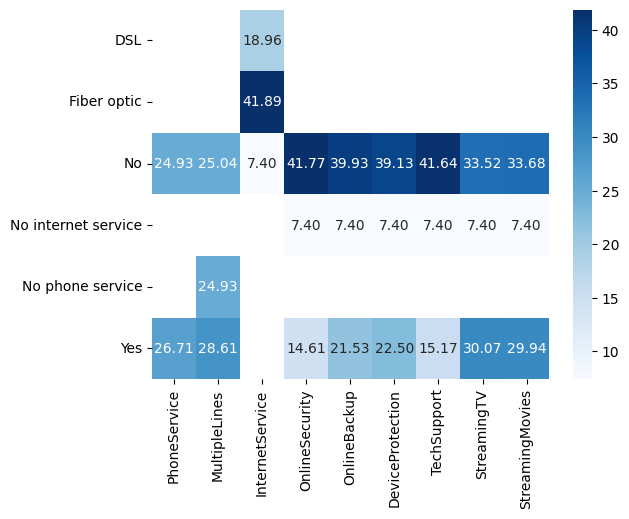

In [6]:
# Churn Rates by Service Features
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

service_df = {}

for feature in service_features:
    rates = churn_data_modified.groupby(feature)['Churn'].value_counts(normalize=True).unstack().fillna(0)[1] * 100
    service_df[feature] = rates

service_df = pd.DataFrame(service_df)
sns.heatmap(service_df, annot=True, fmt=".2f", cmap='Blues')
plt.show()

In [7]:
# Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_features = churn_data_modified.select_dtypes(include=['object', 'category']).columns.tolist()
binary_features = []
multiclass_features = []

# Show the number of unique values in each categorical feature
# Add the feature to binary or multiclass lists based on the number of unique values
print("Categorical Features and their unique values:")
for features in categorical_features:
    print(features, churn_data_modified[features].nunique(), churn_data_modified[features].unique())
    if churn_data_modified[features].nunique() == 2:
        binary_features.append(features)
    else:
        multiclass_features.append(features)

# Mapping the binary features to numerical values
for feature in binary_features:
    churn_data_modified[feature] = churn_data_modified[feature].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# One-hot encoding the multiclass features
churn_data_modified = pd.get_dummies(churn_data_modified, columns=multiclass_features, drop_first=True)

# Shape of the modified DataFrame
print("Shape of the modified data:", churn_data_modified.shape)
churn_data_modified.info()

Categorical Features and their unique values:
gender 2 ['Female' 'Male']
Partner 2 ['Yes' 'No']
Dependents 2 ['No' 'Yes']
PhoneService 2 ['No' 'Yes']
MultipleLines 3 ['No phone service' 'No' 'Yes']
InternetService 3 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 3 ['No' 'Yes' 'No internet service']
OnlineBackup 3 ['Yes' 'No' 'No internet service']
DeviceProtection 3 ['No' 'Yes' 'No internet service']
TechSupport 3 ['No' 'Yes' 'No internet service']
StreamingTV 3 ['No' 'Yes' 'No internet service']
StreamingMovies 3 ['No' 'Yes' 'No internet service']
Contract 3 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 2 ['Yes' 'No']
PaymentMethod 4 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
tenure_group 6 ['0-12', '25-36', '37-48', '13-24', '60-72', '49-60']
Categories (6, object): ['0-12' < '13-24' < '25-36' < '37-48' < '49-60' < '60-72']
Shape of the modified data: (7043, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to

In [8]:
# Performing the train-test split for model training
from sklearn.model_selection import train_test_split

X = churn_data_modified.drop(columns=['Churn'])
y = churn_data_modified['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Saving the modified DataFrame to a new CSV file
churn_data_modified.to_csv("customer_churn_modified.csv", index=False)

# Saving the train and test sets to CSV files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

X_train shape: (5634, 37)
X_test shape: (1409, 37)
y_train shape: (5634,)
y_test shape: (1409,)
